In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [6]:
(train_images,train_labels),(test_images,test_labels) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 368s 2us/step


In [7]:
import matplotlib.pyplot as plt

## Convolution Base

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [10]:
model = keras.models.Sequential()

In [14]:
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(10))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [22]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
history = model.fit(train_images, train_labels, epochs=10,validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.7084 - accuracy: 0.3925 - val_loss: 1.5093 - val_accuracy: 0.4754
Epoch 2/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.3244 - accuracy: 0.5290 - val_loss: 1.2272 - val_accuracy: 0.5650
Epoch 3/10
1563/1563 [==============================] - 46s 30ms/step - loss: 1.1750 - accuracy: 0.5872 - val_loss: 1.1979 - val_accuracy: 0.5912
Epoch 4/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.0705 - accuracy: 0.6264 - val_loss: 1.1607 - val_accuracy: 0.5974
Epoch 5/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.9878 - accuracy: 0.6573 - val_loss: 1.0575 - val_accuracy: 0.6376
Epoch 6/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.9227 - accuracy: 0.6781 - val_loss: 1.0389 - val_accuracy: 0.6489
Epoch 7/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.8638 - accuracy: 0.6969 - val_loss: 1.0448 -

313/313 - 2s - loss: 1.0382 - accuracy: 0.6684


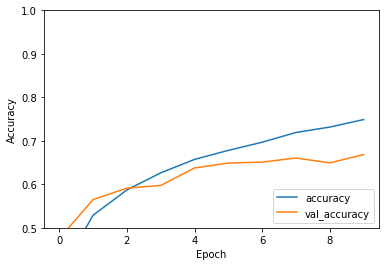

In [25]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [26]:
print(test_acc)

0.66839998960495
